# Introduction

In today's world, income is an essential factor that determines the quality of life. Understanding the factors that contribute to high income levels can help individuals, businesses, and governments make better decisions.

In this Kaggle notebook, we will be exploring the Income Classification dataset from the UC Irvine Machine Learning Repository. The goal of this dataset is to predict whether an individual's income exceeds $50,000 per year or not based on various features such as age, education level, occupation, and more.

The Income Classification problem is a binary classification task where the target variable is either 0 or 1, representing whether the individual's income is less than or equal to (50,000) or more than    (50,000) respectively.

We will be using various machine learning techniques to build a model that can accurately predict an individual's income level based on the given features. This problem provides an excellent opportunity to explore different machine learning algorithms and techniques and compare their performance on a real-world dataset.

Let's dive into the data and see what insights we can uncover!

# Libraries and Data Import

To begin, let's import the necessary libraries that we'll be using throughout this notebook:

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

Now, let's import the Income Classification dataset from the UC Irvine Machine Learning Repository using the read_csv() function from pandas:

In [2]:
df = pd.read_csv('/kaggle/input/income-classification/income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The head() function displays the first 5 rows of the dataset, allowing us to get a sense of what the data looks like. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


The info() function provides information about the dataset, such as the number of non-null values and the data types of each feature. the describe() function gives us summary statistics for each numerical feature in the dataset.

# Data Cleaning

Before we can start modeling, we need to clean the Income Classification dataset by handling missing values, and removing duplicates

In [5]:
# Rename columns with spaces to column names without spaces
df.columns = df.columns.str.replace(' ', '')

In [6]:
# Replace " ?" values in the dataset with "Other"
df = df.replace(' ?',' Others')

In [7]:
# Remove duplicate instances
df.drop_duplicates(inplace=True)

# Data Visualization

Here, I attempted to use a pie chart to assess the balance of the dataset by visualizing the proportions of each category in the target variable (income level).

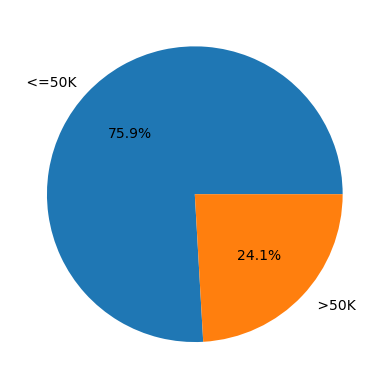

In [8]:
plt.pie(df.income.value_counts(),labels = df.income.unique(),autopct='%1.1f%%')
plt.show()

In [9]:
capital_gain = df[df['capital-gain'] > 0]
capital_loss = df[df['capital-loss'] > 0]

In [10]:
capital_gain.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Here, I calculated the average value of the 'capital-gain' column to investigate whether non-zero values in this column have an impact on the target variable. By checking the average value, I can get a sense of the distribution of the 'capital-gain' variable and see if it has any correlation with the target variable.

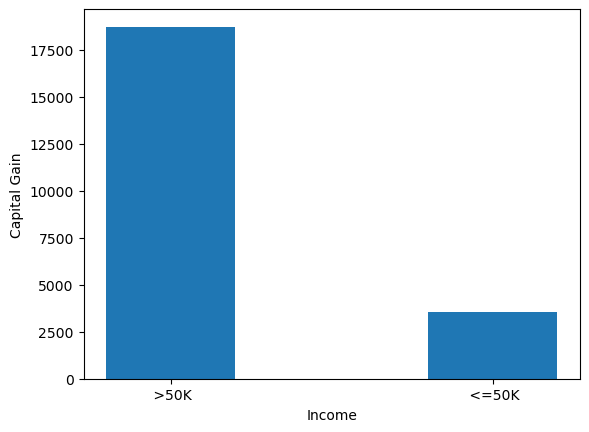

In [11]:
xx = capital_gain['income'].value_counts().keys()
yy=[capital_gain[capital_gain['income'] == i]['capital-gain'].mean() for i in xx]
plt.bar(xx, yy,width = 0.4)
 
plt.xlabel("Income")
plt.ylabel("Capital Gain")
plt.show()

I also calculated the average value of the 'capital-loss' column to investigate if non-zero values in this column have any relationship with the target variable.

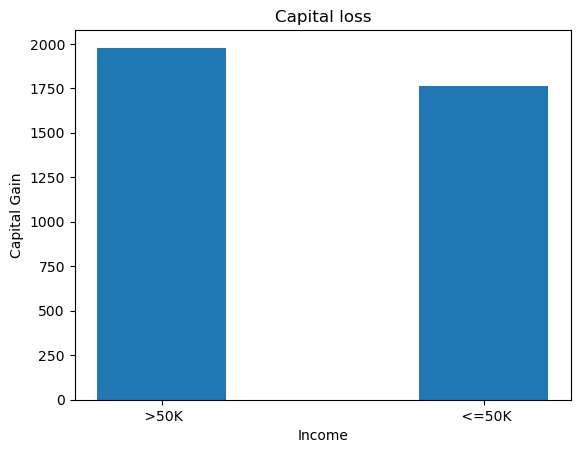

In [12]:
xx = capital_loss['income'].value_counts().keys()
yy=[capital_loss[capital_loss['income'] == i]['capital-loss'].mean() for i in xx]
plt.bar(xx, yy,width = 0.4)
 
plt.title('Capital loss')
plt.xlabel("Income")
plt.ylabel("Capital Gain")
plt.show()

I utilized 'value_counts' function to observe the frequency of each unique value in the 'native-country' column. By doing so, I was able to identify which countries are most common in the dataset and determine whether there are any imbalances in the representation of different countries in the data.

In [13]:
print(df['native-country'].value_counts(normalize=True)[:5])

 United-States    0.895995
 Mexico           0.019639
 Others           0.017887
 Philippines      0.006085
 Germany          0.004211
Name: native-country, dtype: float64


Here, I examined the distribution of the 'relationship' column and its relationship with the target variable 'income' using a countplot. By using this plot, I was able to visualize the frequency of each unique value in the 'relationship' column and compare the number of occurrences of each value between different income categories. This plot can help to identify if certain categories of 'relationship' are more likely to be associated with higher or lower incomes.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Not-in-family'),
  Text(1, 0, ' Husband'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

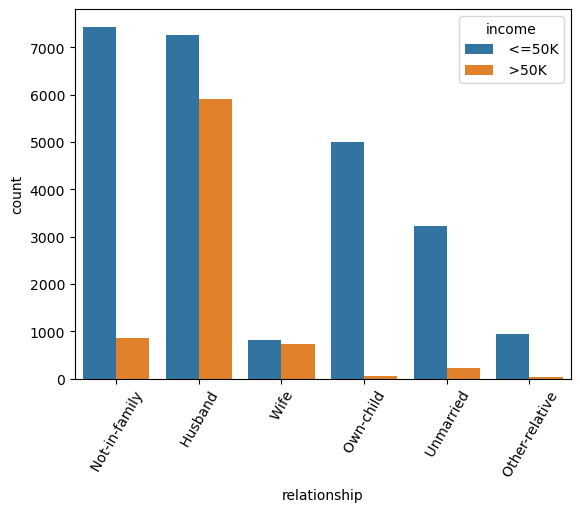

In [14]:
sns.countplot(data=df, x="relationship", hue="income")
plt.xticks(rotation=60)

In order to compare the distribution of 'marital-status' with the target variable 'income' and see if it is different from that of the 'relationship' column, I created a countplot. This plot is similar to the previous countplot, but the 'marital-status' column is used instead of 'relationship'. By comparing these two plots, it is possible to identify any differences or similarities in the distribution of income levels across different marital statuses and relationship categories. This can provide insights into the potential impact of these variables on the target variable.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

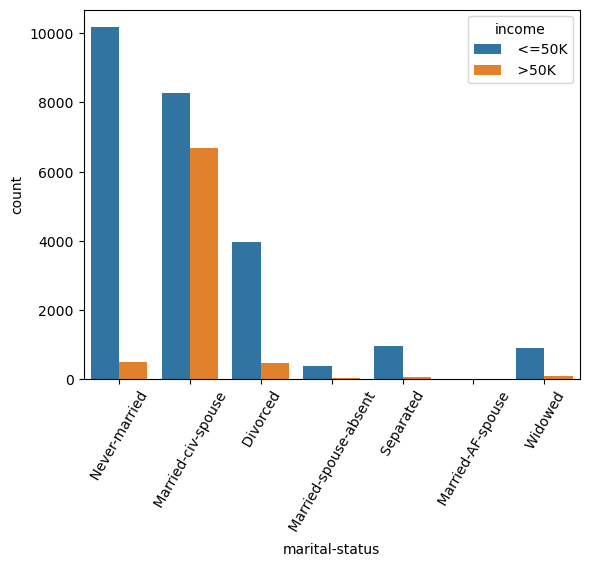

In [15]:
sns.countplot(data=df, x="marital-status", hue="income")
plt.xticks(rotation=60)

I used a countplot to examine the relationship between 'workclass' and 'income' and observe the distribution of income levels across different work classes.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Others'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

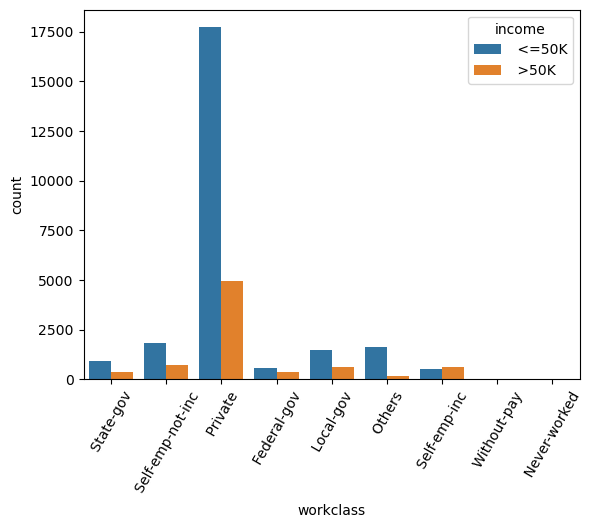

In [16]:
sns.countplot(data=df, x="workclass", hue="income")
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Others'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

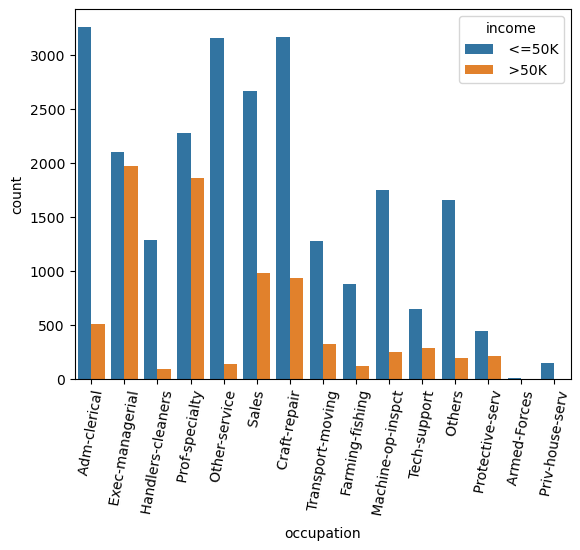

In [17]:
sns.countplot(data=df, x="occupation", hue="income")
plt.xticks(rotation=80)

After visualizing the data and identifying the columns that are not useful for the modeling process, I removed those columns from the dataset. This helps to simplify the dataset and prevent irrelevant or redundant information from impacting the model's performance.

In [18]:
df_new = df.drop(['marital-status','race','fnlwgt', 'education','native-country','workclass'],axis=1)
df_new.head()

,age,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K
1,50,13,Exec-managerial,Husband,Male,0,0,13,<=50K
2,38,9,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K
3,53,7,Handlers-cleaners,Husband,Male,0,0,40,<=50K
4,28,13,Prof-specialty,Wife,Female,0,0,40,<=50K


In [19]:
df_new.head(3)

,age,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K
1,50,13,Exec-managerial,Husband,Male,0,0,13,<=50K
2,38,9,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

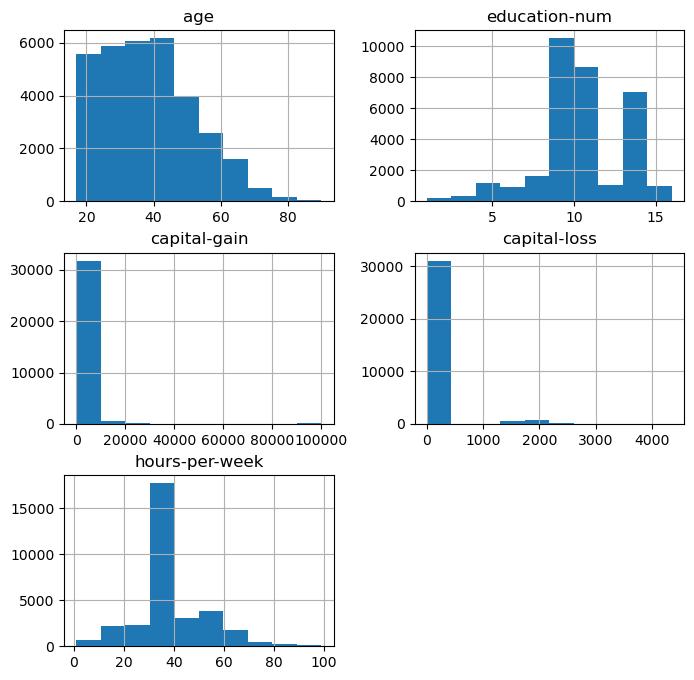

In [20]:
df_new.select_dtypes(include=np.number).hist(figsize=(8,8))

<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

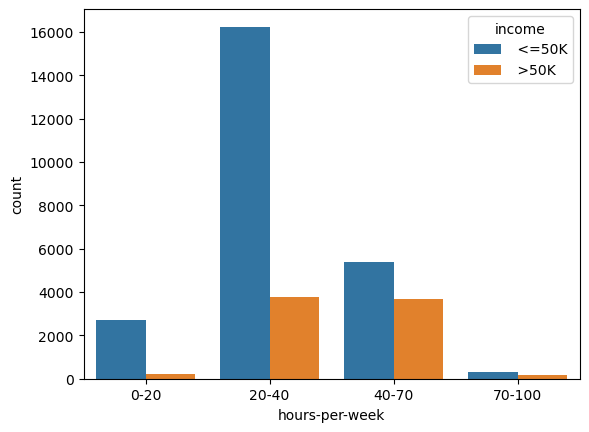

In [21]:
xx = pd.cut(df_new['hours-per-week'], bins=[0,20,40,70,100], include_lowest=True, labels=['0-20', '20-40', '40-70','70-100'])
sns.countplot(x=xx, hue=df["income"])

<AxesSubplot:xlabel='age', ylabel='count'>

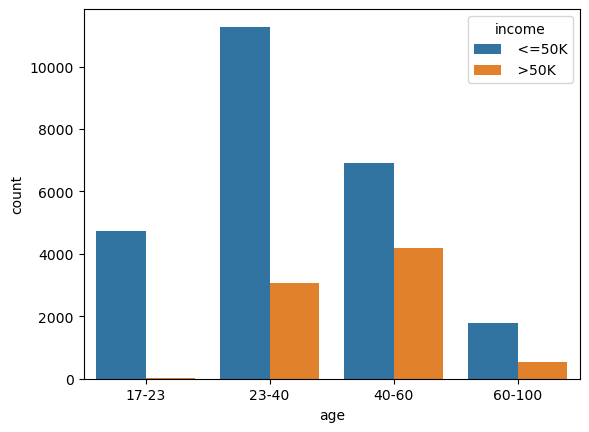

In [22]:
xx = pd.cut(df_new['age'], bins=[17,23,40,60,100], include_lowest=True, labels=['17-23', '23-40', '40-60','60-100'])
sns.countplot(x=xx, hue=df["income"])

# Data Preprocessing

Data encoding to transform categorical data into numerical values.

In [23]:
df_new['income'].replace({' <=50K':1,' >50K':0},inplace=True)
df_new['sex'].replace({' Male':1,' Female':0},inplace=True)
df_new.head(2)

,age,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,Adm-clerical,Not-in-family,1,2174,0,40,1
1,50,13,Exec-managerial,Husband,1,0,0,13,1


In [24]:
one_hot_encoded_data = pd.get_dummies(df_new, columns = ['occupation', 'relationship'])
one_hot_encoded_data

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,13,1,2174,0,40,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,50,13,1,0,0,13,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,38,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7,1,0,0,40,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,28,13,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,38,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32557,40,9,1,0,0,40,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32558,58,9,0,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
32559,22,9,1,0,0,20,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Splitting the data into input features (X) and target variable (y).

In [25]:
X = one_hot_encoded_data.drop('income',axis=1)
y = one_hot_encoded_data.income
X.shape,y.shape

((32537, 27), (32537,))

Standardizing the input features using StandardScaler to scale the data.

In [26]:
scaler = StandardScaler()

# transform data
X = scaler.fit_transform(X)

Splitting the data into training and testing sets using train_test_split.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((24402, 27), (8135, 27))

# Model Building

For the model building step, I first utilized a decision tree algorithm to create a classifier. To ensure the model's generalization performance, I performed cross-validation.

In [28]:
clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 4)

scores = cross_val_score(clf, X_train, y_train, cv = 10)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.81319132 0.80745596 0.81188525 0.8        0.82622951 0.82418033
 0.81762295 0.82213115 0.82131148 0.81229508]
Average CV Score:  0.8156303013411594
Number of CV Scores used in Average:  10


After using a decision tree model with cross-validation, I decided to try out a different algorithm to see if it would perform better. I chose to use logistic regression, which is a commonly used algorithm for binary classification problems like the one in this dataset.

In [29]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_train, y_train),clf.score(X_test, y_test)

scores = cross_val_score(clf, X_train, y_train, cv = 10)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.85170012 0.84719377 0.84754098 0.84385246 0.85696721 0.84959016
 0.85327869 0.86434426 0.85040984 0.85      ]
Average CV Score:  0.8514877502501663
Number of CV Scores used in Average:  10


After using logistic regression, I observed that the model performed better than the decision tree algorithm. To further evaluate the model's performance, I utilized a confusion matrix. which can provide insights into the model's performance in terms of accuracy, precision, recall, and F1-score.

In [30]:
y_pred = clf.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[ 3553,  2326],
       [ 1280, 17243]])

To improve the model's performance, I utilized ensemble learning, which combines the predictions of multiple models to create a single prediction. Specifically, I used a voting classifier that combines the predictions of five different models to produce a final prediction. This approach can improve the model's performance by reducing overfitting and increasing accuracy.

In [31]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GradientBoostingClassifier()
clf4 = XGBClassifier()
clf5 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gbc', clf3),('xgb',clf4),('abc',clf5)], voting='soft')

In [32]:
eclf1 = eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[ 4214,  1665],
       [  591, 17932]])

# Model Evaluation

In [33]:
scores = cross_val_score(eclf1, X_train, y_train, cv = 5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.86416718 0.8588404  0.87192623 0.87110656 0.87151639]
Average CV Score:  0.8675113521483437
Number of CV Scores used in Average:  5


After training the voting classifier, I evaluated its performance on the testing set to assess how well the model generalizes to new data. This step is important because it allows us to estimate the model's true performance on unseen data. I utilized various evaluation metrics such as accuracy, precision, recall, and F1-score. These metrics help us understand how well the model is performing in terms of correctly classifying income levels.

In [34]:
y_pred = eclf1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67      1960
           1       0.88      0.94      0.91      6175

    accuracy                           0.86      8135
   macro avg       0.82      0.77      0.79      8135
weighted avg       0.85      0.86      0.85      8135



# Conclusion

After performing data exploration, preprocessing, model building, and evaluation, we can conclude that:

1. The data contains information about individuals' demographic, education, and work-related attributes, which can be used to predict their income level.
2. The dataset was preprocessed to handle missing values, encode categorical features, and scale the numerical features.
3. We trained multiple models, including Decision Tree, Logistic Regression, and a Voting Classifier, to predict the income level.
4. The Voting Classifier outperformed the other models in terms of accuracy, precision, recall, F1-score. It achieved an accuracy of 86.1% on the testing set.
5. The Voting Classifier model can be used to predict income levels for individuals based on their demographic, education, and work-related attributes.

Overall, the project demonstrates the importance of data exploration, preprocessing, and model selection in developing accurate and reliable machine learning models.